In [1]:
#Libraries

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
# from sklearn.linear_model import LinearRegression, LassoLars
# from sklearn.linear_model import TweedieRegressor
# from sklearn.feature_selection import RFE
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans


# Exploring
import scipy.stats as stats
import math

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

# default pandas decimal number display format
# pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
import os
import env
import acquire
import wrangle_zillow

credentials loaded successfully
End of file.
Loaded zillow wrangle functions successfully.


In [3]:
pd.options.display.max_columns = 50

# Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset
    Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    
    b. Visualize the results of your clustering.
    
    c. Use the elbow method to visually select a good value for k.
    
    d. Repeat the clustering, this time with 3 different features.

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
# Defining which columns in the dataset need to be scaled (I would leave out categorical columns from this list, like zip code or fips code in the zillow data.)
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [7]:
train.shape, train_scaled.shape

((121, 5), (121, 5))

In [8]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
142,5.8,2.7,5.1,1.9,virginica
82,5.8,2.7,3.9,1.2,versicolor
127,6.1,3.0,4.9,1.8,virginica
28,5.2,3.4,1.4,0.2,setosa


In [9]:
train_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
41,-1.608304,-1.741994,-1.333104,-1.141286,setosa
142,-0.040855,-0.847906,0.796712,1.005974,virginica
82,-0.040855,-0.847906,0.124139,0.066547,versicolor
127,0.320864,-0.177340,0.684617,0.871770,virginica
28,-0.764293,0.716748,-1.277056,-1.275490,setosa


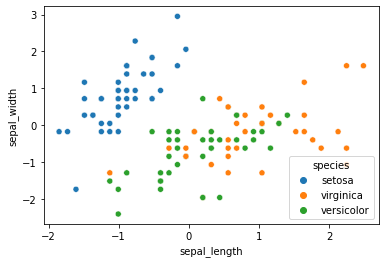

In [10]:
# Actual grouping

sns.scatterplot(data = train_scaled, x = 'sepal_length', y = 'sepal_width', hue = "species")
plt.show()

In [11]:
X = train_scaled[['petal_length', 'sepal_length']]

In [12]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

kmeans.predict(X)

array([2, 0, 0, 0, 2, 0, 1, 2, 1, 3, 2, 3, 2, 3, 3, 2, 0, 1, 2, 3, 0, 0,
       2, 2, 2, 2, 0, 2, 3, 0, 0, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 0, 1, 3,
       3, 0, 2, 0, 0, 3, 0, 3, 3, 1, 1, 3, 2, 2, 2, 3, 2, 2, 0, 0, 2, 1,
       2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 0, 2, 2, 3, 3, 1, 2, 2, 2, 3, 0, 0,
       0, 0, 1, 2, 0, 3, 2, 3, 3, 0, 2, 2, 0, 0, 2, 3, 3, 0, 2, 0, 0, 0,
       1, 0, 0, 3, 3, 3, 2, 3, 2, 2, 2], dtype=int32)

In [13]:
pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)

,petal_length,sepal_length
0,0.389092,-0.099315
1,1.479476,1.954079
2,-1.174708,-0.958258
3,0.803944,0.834271


In [14]:
X.shape

(121, 2)

In [15]:
kmeans.labels_.shape

(121,)

In [16]:
train["cluster"] = kmeans.labels_

In [17]:
kmeans.inertia_

23.269071350867947

In [18]:
# Nice, so that's why we used the .copy() function above. Notice that the train_scaled df didn't get an extra column, since it doesn't refer to the original train dataframe, but a new one.

train.shape, train_scaled.shape

((121, 6), (121, 5))

In [19]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.751515,2.727273,4.372727,1.430303
1,7.454545,3.136364,6.318182,2.027273
2,5.039130,3.380435,1.582609,0.306522
3,6.525806,2.987097,5.112903,1.793548


<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

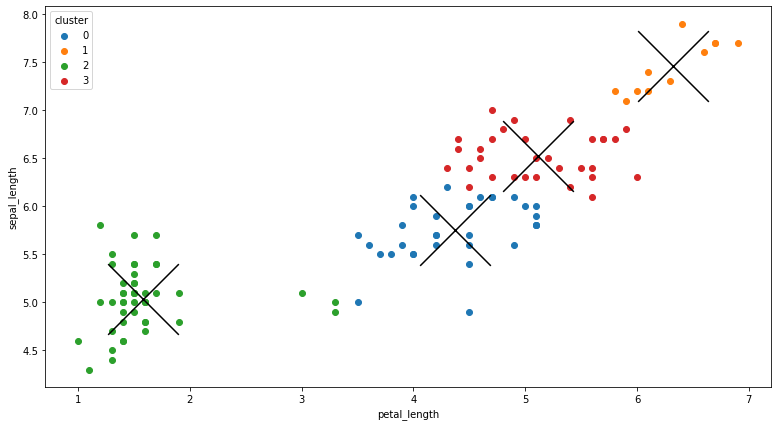

In [20]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='petal length')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')

####  Use the elbow method to visually select a good value for k.

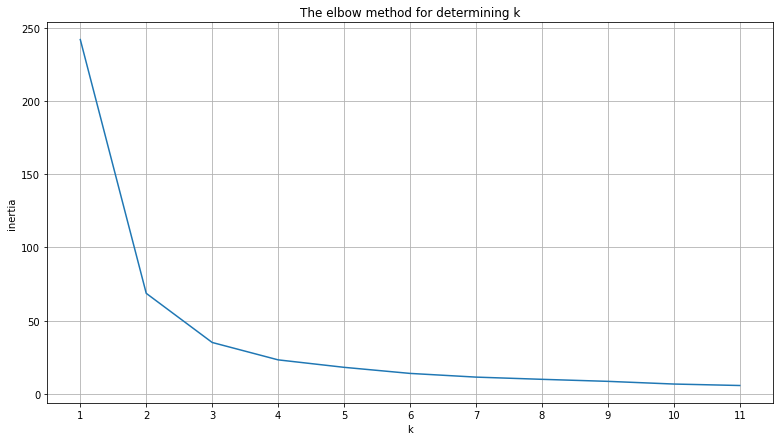

In [21]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

#### Takeaway:
3 or maybe 4 appears to be the point of diminishing returns for additional centroids. So we could try using 3, or leave it at 4. Both are about the same level of benefit base on this visual

#### d. Repeat the clustering, this time with 3 different features.

In [23]:
train_scaled2 = train_scaled.copy()
train2 = train.copy()
train2.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,2
142,5.8,2.7,5.1,1.9,virginica,0
82,5.8,2.7,3.9,1.2,versicolor,0
127,6.1,3.0,4.9,1.8,virginica,0
28,5.2,3.4,1.4,0.2,setosa,2


In [24]:
X2 = train_scaled2[['sepal_width', 'sepal_length', 'petal_length', 'petal_width']]
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(X2)

KMeans(n_clusters=3)

In [25]:
pd.DataFrame(kmeans2.cluster_centers_, columns = X2.columns)

,sepal_width,sepal_length,petal_length,petal_width
0,0.825910,-0.954967,-1.237953,-1.200586
1,-0.924231,-0.070263,0.378404,0.348048
2,0.064306,1.187685,1.019389,1.009601


In [26]:
# These should all be the same size.

X2.shape

(121, 4)

In [27]:
kmeans2.labels_.shape

(121,)

In [28]:
kmeans2.labels_

array([0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1,
       1, 1, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 0, 2, 0, 1, 0], dtype=int32)

In [29]:
train2["cluster"] = kmeans2.labels_

In [30]:
train2.shape, train_scaled2.shape

((121, 6), (121, 5))

In [31]:
train2.cluster.value_counts().sort_index()

0    43
1    41
2    37
Name: cluster, dtype: int64

In [32]:
train2.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.041860,3.448837,1.469767,0.255814
1,5.775610,2.665854,4.353659,1.409756
2,6.818919,3.108108,5.497297,1.902703


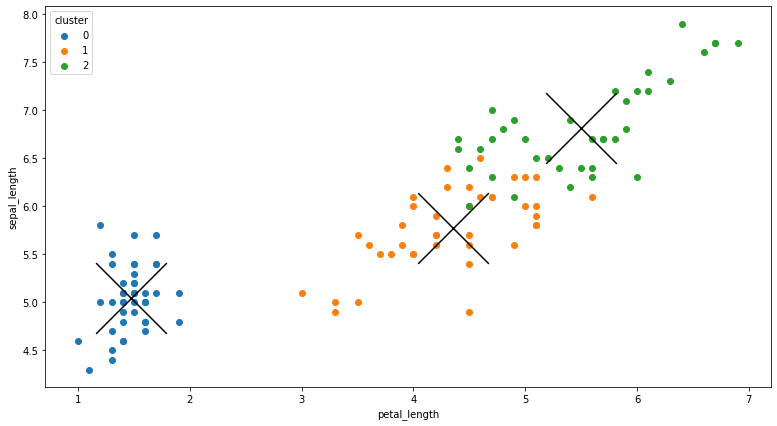

In [34]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train2.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='petal length')

train2.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')
plt.show()

Now using the elbow method to review number of clusters:

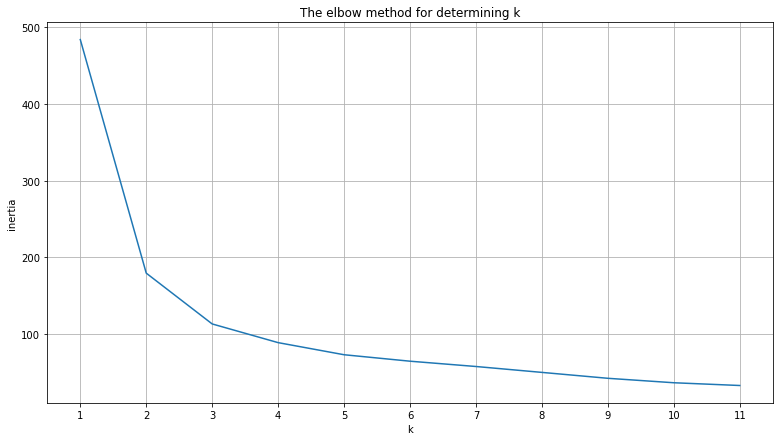

In [36]:
output = {}

for k in range(1, 12):
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(X2)
    output[k] = kmeans2.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

Confirms that 3-4 clusters is the optimal number of groups for this dataset.

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.